<a href="https://colab.research.google.com/github/vitormarx/Sales_Prediction/blob/main/sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><b> Sales Predictions </b></h1>

Lets imagine that the VM Store takes a .csv file containing all sales process, the data science team have a mission to do. Analyse all 2019 data of sales and propose some insights to the new year 2020. 

<h3><b>Our analysis could be able to answer these Business Questions:</b><h3>

*   **How the sales were distributed along the year?** This question makes the company knows the months with the highest demand for products. It helps them to prepare the inventory of their subsidiaries.

*   **Which subsidiary sales more ?** Generally, the demand of products changes occording to subsidiaries local consummers. 

*   **Which products are most popular?** Answering this question, we know which products needs to be more explored. They are the main product to sale.

*   **What product returns more profit?** Sells more isn't necessarialy have more products. This question help is to know which products are more profitable to the company. Knowing this, some strategy things could be done to try sell it more.



Looking for more inventory control and reduce outgoings, the company want to develop a machine learning model to predict the next month sales number for each product by subsidiary.


In [ ]:
# importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import os
from collections import Counter

from sklearn.model_selection import train_test_split

In [ ]:
# importing data
PATH = '/content/drive/MyDrive/Colab Notebooks/Sales Prediction/dataset'
files = os.listdir(PATH) # list files into the path

raw_data = pd.DataFrame()

for file in files:
  df = pd.read_csv(PATH + '/' + file)
  raw_data = pd.concat([raw_data, df])

raw_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


This is the first look we have about the data. We can see the information we have about them like:


*   **Order ID:** Identifies the people who sold
*   **Product:** What product was sold
*   **Quantity Ordered:**	The quantity of product ordered
*   **Price Each:**	The price of the product by unit
*   **Order Date:**	The date of the product was ordered
*   **Purchase Address:** The address of subsidiary that done the sell.

Now, its time to get start with our analysis! however, we can´t do it before prepare the data. This step is called preprocess and the steps are:

* Cleaning the data:
  * check missing value
  * check dtype of variables
  * check outliers

<h4><b>Cleaning our data</b></h4>
This step is very important before our analysis, preparing the data we can fix a lot of bad data that could disturb the next steps. 

In [ ]:
# getting general informations about variables
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [ ]:
# transform numeric columns
raw_data['Price Each'] = pd.to_numeric(raw_data['Price Each'], errors='coerce')
raw_data['Quantity Ordered'] = pd.to_numeric(raw_data['Quantity Ordered'], errors='coerce')
raw_data.drop('Order ID', axis=1, inplace=True)

# transfor datetime colum
raw_data['Order Date']= pd.to_datetime(raw_data['Order Date'], errors='coerce')


In [ ]:
# percentage of data missing
print(raw_data.isna().mean())
print(f'Total data missing: {raw_data.isna().mean().sum() * 100:.3f} %')

Product             0.002917
Quantity Ordered    0.004817
Price Each          0.004817
Order Date          0.004817
Purchase Address    0.002917
dtype: float64
Total data missing: 2.028 %


We have missing values and some inconsistences related to the type of them are reported. We need to fix it.

1.   drop missing values cause it's just 2.510% of all data
2.   change Dtype of Order ID to numeric
3.   change Dtype of Quantity Ordered to numeric
4.   change Dtype of Price Each to numeric
5.   change Dtype of Order Date to datetime



In [ ]:
# drop missing values
raw_data = raw_data.dropna()

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 25116
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Product           185950 non-null  object        
 1   Quantity Ordered  185950 non-null  float64       
 2   Price Each        185950 non-null  float64       
 3   Order Date        185950 non-null  datetime64[ns]
 4   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 8.5+ MB


In [ ]:
raw_data.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"


In [ ]:
raw_data.describe()

,Quantity Ordered,Price Each
count,185950.000000,185950.000000
mean,1.124383,184.399735
std,0.442793,332.731330
min,1.000000,2.990000
25%,1.000000,11.950000
50%,1.000000,14.950000
75%,1.000000,150.000000
max,9.000000,1700.000000


<h2><b>Data analysis</b></h4>

It's time to answer some questions we are looking for. Let's start it answering.

**1. How the sales were distributed along the year?**

In [ ]:
# creating an especific dataframe
df = raw_data.drop(labels=['Product', 'Purchase Address', 'Price Each'], axis=1)

# creating month atribute
df['Month'] = df['Order Date'].dt.month

# sum of products by month
df = df.groupby(['Month']).sum().reset_index()
df.head(12)

,Month,Quantity Ordered
0,1,10903.0
1,2,13449.0
2,3,17005.0
3,4,20558.0
4,5,18667.0
5,6,15253.0
6,7,16072.0
7,8,13448.0
8,9,13109.0
9,10,22703.0


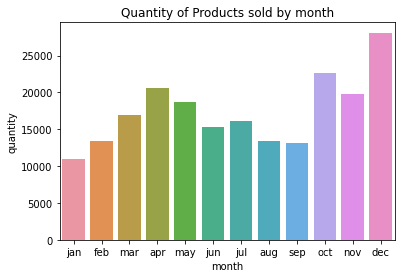

In [ ]:
# generate the graph of tends

months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

sns.barplot(x=df['Month'], y=df['Quantity Ordered'])
plt.title('Quantity of Products sold by month')
plt.xticks(range(len(months)), months)
plt.xlabel('month')
plt.ylabel('quantity')
plt.show()

December is the month that is most used to costumers buy some thing. Sure this is the month that happens christmas and new years party.

**2. Which subsidiary sales more?**

In [ ]:
# creating an especific dataframe
df = raw_data.drop(labels=['Product', 'Order Date', 'Price Each'], axis=1)

# creating subsidiary atribute
df['Subsidiary'] = df['Purchase Address'].apply(lambda x: x.split(',')[1])

# sum of products by subsidiary
df = df.groupby(['Subsidiary']).sum().reset_index()
df.head(9)

,Subsidiary,Quantity Ordered
0,Atlanta,16602.0
1,Austin,11153.0
2,Boston,22528.0
3,Dallas,16730.0
4,Los Angeles,33289.0
5,New York City,27932.0
6,Portland,14053.0
7,San Francisco,50239.0
8,Seattle,16553.0


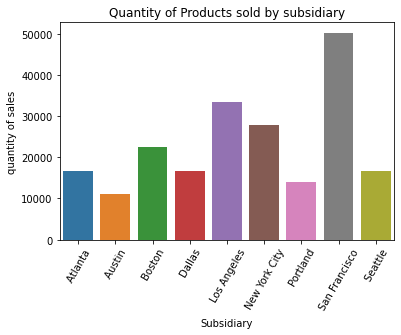

In [ ]:
# generate graphic

subsidiaries = df['Subsidiary'].unique()


sns.barplot(x=df['Subsidiary'], y=df['Quantity Ordered'])
plt.title('Quantity of Products sold by subsidiary')
plt.xticks(range(len(subsidiaries)), subsidiaries, rotation=60)
plt.xlabel('Subsidiary')
plt.ylabel('quantity of sales')
plt.show()

The subsidiary of los angeles sells more than others.

**3. Which products are most popular?**

In [ ]:
# creating an especific dataframe
df = raw_data.copy()

# creating month atribute
df['Month'] = df['Order Date'].dt.month

# creating subsidiary atribute
df['Subsidiary'] = df['Purchase Address'].apply(lambda x: x.split(',')[1])

df.drop(['Order Date', 'Price Each', 'Purchase Address'], axis=1, inplace=True)

# quantity of products ordered in each subsidiary by month
df = df.groupby(['Product','Month','Subsidiary']).sum().reset_index()
df.head()

,Product,Month,Subsidiary,Quantity Ordered
0,20in Monitor,1,Atlanta,15.0
1,20in Monitor,1,Austin,12.0
2,20in Monitor,1,Boston,21.0
3,20in Monitor,1,Dallas,22.0
4,20in Monitor,1,Los Angeles,34.0


In [ ]:


fig = px.bar(df, x="Subsidiary", y="Quantity Ordered", animation_frame="Month",
                 color="Product", barmode="group", 
           )
fig.show()

According to the graphic above, the Batteries and Cables are to categories of products that have too much sells every month. So le's divide the products by category and check it. maybe its an important variable to the future sales prediction.

In [ ]:
# creating category variable
def get_category(x):
  if x in ['20in Monitor', '27in 4K Gaming Monitor', '27in FHD Monitor', '34in Ultrawide Monitor']:
    return 'Monitor'
  elif x in ['AA Batteries (4-pack)', 'AAA Batteries (4-pack)']:
    return 'Battery'
  elif x in ['Wired Headphones', 'Bose SoundSport Headphones', 'Apple Airpods Headphones']:
    return 'Headphone'
  elif x in ['USB-C Charging Cable', 'Lightning Charging Cable']:
    return 'Cable'
  elif x in ['Macbook Pro Laptop', 'ThinkPad Laptop']:
    return 'Laptop'
  elif x in ['iPhone', 'Vareebadd Phone', 'Google Phone']:
    return 'SmartPhone'
  elif x in ['LG Dryer', 'LG Washing Machine']:
    return 'Home Applience'
  elif x in ['Flatscreen TV']:
    return 'SmartTV'

df['Category'] = df['Product'].apply(lambda x: get_category(x))
df = df.groupby(['Category', 'Month',	'Subsidiary']).sum().reset_index()
df.head()

,Category,Month,Subsidiary,Quantity Ordered
0,Battery,1,Atlanta,234.0
1,Battery,1,Austin,159.0
2,Battery,1,Boston,326.0
3,Battery,1,Dallas,271.0
4,Battery,1,Los Angeles,473.0


In [ ]:
# generate graphic
fig = px.bar(df, x="Subsidiary", y="Quantity Ordered", animation_frame="Month",
                 color="Category", barmode="group", 
           )
fig.show()

Batteries, Cables and Headphone are products we need to have a lot in our subsidiaries, they sell too much along of the months. However, home appliences are not too sold and we can considerate continue sell them or not.

**4. What product returns more profit?**

In [ ]:
# creating an especific dataframe
df = raw_data.drop(labels=['Purchase Address', 'Order Date'], axis=1)

df['Total Profit'] = df['Quantity Ordered'] * df['Price Each']
#df.drop(['Price Each'], axis=1, inplace=True)

# sum of products by month
df = df.groupby(['Product','Price Each']).sum().reset_index()
df.head(19)

,Product,Price Each,Quantity Ordered,Total Profit
0,20in Monitor,109.99,4129.0,454148.71
1,27in 4K Gaming Monitor,389.99,6244.0,2435097.56
2,27in FHD Monitor,149.99,7550.0,1132424.50
3,34in Ultrawide Monitor,379.99,6199.0,2355558.01
4,AA Batteries (4-pack),3.84,27635.0,106118.40
5,AAA Batteries (4-pack),2.99,31017.0,92740.83
6,Apple Airpods Headphones,150.00,15661.0,2349150.00
7,Bose SoundSport Headphones,99.99,13457.0,1345565.43
8,Flatscreen TV,300.00,4819.0,1445700.00
9,Google Phone,600.00,5532.0,3319200.00


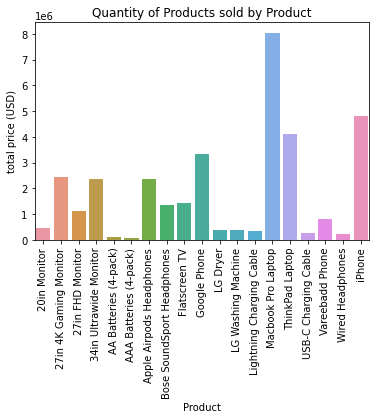

In [ ]:
# generate graphic
products = df['Product'].unique()


sns.barplot(x=df['Product'], y=df['Total Profit'])
plt.title('Quantity of Products sold by Product')
plt.xticks(range(len(products)), products, rotation=90)
plt.xlabel('Product')
plt.ylabel('total price (USD)')
plt.show()

Even though batteries are the best selling products, they don't bring much profit because their unit prices are very low. However, products with annual sales quantity above 2000 and with a higher unit value are the products that generate the most profit for the company.

<h3><b>Machine Learning model</b></h3>

Creating a predictive algorithm to predict the sales by month.

In [ ]:
# creating dataset
dataset = raw_data.copy()


dataset['Month'] = dataset['Order Date'].dt.month
dataset['Subsidiary'] = dataset['Purchase Address'].apply(lambda x: x.split(',')[1])
dataset['Category'] = dataset['Product'].apply(lambda x: get_category(x))

dataset

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Subsidiary,Category
0,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,Boston,SmartPhone
1,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,Portland,Cable
2,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,San Francisco,Headphone
3,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,Los Angeles,Monitor
4,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,Austin,Headphone
...,...,...,...,...,...,...,...,...
25112,Lightning Charging Cable,1.0,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",12,San Francisco,Cable
25113,AA Batteries (4-pack),2.0,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",12,Los Angeles,Battery
25114,Vareebadd Phone,1.0,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",12,Seattle,SmartPhone
25115,Wired Headphones,1.0,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",12,Dallas,Headphone


In [ ]:
dataset = dataset.groupby(['Product', 'Month', 'Subsidiary', 'Category', 'Price Each']).sum().reset_index()
dataset

,Product,Month,Subsidiary,Category,Price Each,Quantity Ordered
0,20in Monitor,1,Atlanta,Monitor,109.99,15.0
1,20in Monitor,1,Austin,Monitor,109.99,12.0
2,20in Monitor,1,Boston,Monitor,109.99,21.0
3,20in Monitor,1,Dallas,Monitor,109.99,22.0
4,20in Monitor,1,Los Angeles,Monitor,109.99,34.0
...,...,...,...,...,...,...
2043,iPhone,12,Los Angeles,SmartPhone,700.00,154.0
2044,iPhone,12,New York City,SmartPhone,700.00,138.0
2045,iPhone,12,Portland,SmartPhone,700.00,56.0
2046,iPhone,12,San Francisco,SmartPhone,700.00,190.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



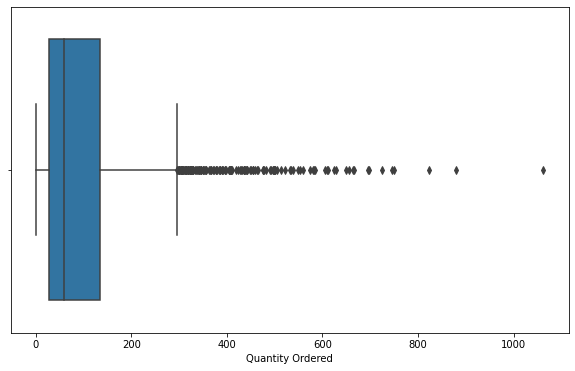

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(dataset['Quantity Ordered'])
plt.show()

In [ ]:
dataset = dataset[(dataset['Quantity Ordered']<=800) & (dataset['Quantity Ordered']>=0)]

In [ ]:
X = dataset.drop(labels=['Quantity Ordered'], axis=1)
y = dataset['Quantity Ordered']

# Creating training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from catboost import CatBoostRegressor
model = CatBoostRegressor(learning_rate=0.1, depth=10, iterations=2000)

# 
cats = X.select_dtypes(include=["object"]).columns.tolist()
# Fit model
model = model.fit(X_train, y_train, cats)
# Get predictions
y_pred = model.predict(X_test)

0:	learn: 106.9179834	total: 4.32ms	remaining: 8.64s
1:	learn: 98.9250625	total: 10.9ms	remaining: 10.9s
2:	learn: 91.9054110	total: 12ms	remaining: 7.99s
3:	learn: 85.8544332	total: 18ms	remaining: 8.99s
4:	learn: 80.4210821	total: 23.7ms	remaining: 9.45s
5:	learn: 75.5662974	total: 29.2ms	remaining: 9.71s
6:	learn: 70.7721572	total: 35.2ms	remaining: 10s
7:	learn: 66.7549133	total: 39.7ms	remaining: 9.87s
8:	learn: 63.1514128	total: 42.5ms	remaining: 9.4s
9:	learn: 59.8316400	total: 49.1ms	remaining: 9.76s
10:	learn: 56.8375310	total: 60.8ms	remaining: 11s
11:	learn: 54.2110631	total: 67.8ms	remaining: 11.2s
12:	learn: 52.4845898	total: 68.7ms	remaining: 10.5s
13:	learn: 50.1522449	total: 75.2ms	remaining: 10.7s
14:	learn: 48.0878716	total: 82.6ms	remaining: 10.9s
15:	learn: 46.1257084	total: 89.3ms	remaining: 11.1s
16:	learn: 43.9933405	total: 96.1ms	remaining: 11.2s
17:	learn: 42.2963763	total: 100ms	remaining: 11s
18:	learn: 40.7889369	total: 107ms	remaining: 11.1s
19:	learn: 39.3

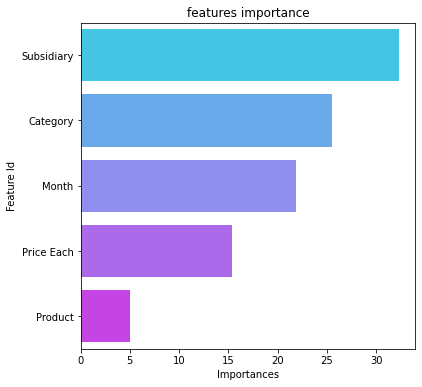

In [ ]:
df_feature_importance = pd.DataFrame(model.get_feature_importance(prettified=True))
#plotting feature importance
plt.figure(figsize=(6, 6));
feature_plot= sns.barplot(x="Importances", y="Feature Id", data=df_feature_importance,palette="cool");
plt.title('features importance');

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import math
y_pred= model.predict(X_test)
#RMSE
Rmse_test = math.sqrt(mean_squared_error(y_test,y_pred))
#R2 Score
r2_test = r2_score(y_test,y_pred)
# Adjusted R2 Score
n= X_train.shape[0] # total no of datapoints
p= X_train.shape[1] # total no of independent features
adj_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)

print("Evaluation on test data")
print("RMSE: {:.3f}".format(Rmse_test))
print("R2: {:.3f}".format(r2_test))
print("Adjusted R2: {:.3f}".format(adj_r2_test))

Evaluation on test data
RMSE: 15.519
R2: 0.978
Adjusted R2: 0.978


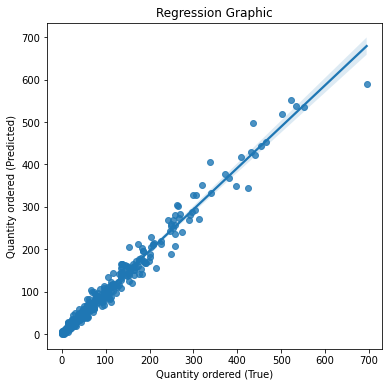

In [ ]:
plt.figure(figsize=(6,6))
sns.regplot(x=y_test, y=y_pred, fit_reg=True)
plt.title('Regression Graphic')
plt.xlabel('Quantity ordered (True)')
plt.ylabel('Quantity ordered (Predicted)')
plt.show()

In [ ]:
pred = pd.DataFrame(columns=X_train.columns,
                    data=np.array([['iPhone',1, 'Dallas', 'Smartphone', 700.0]]))
prediction = model.predict(pred)
print(f'Quantity: {math.ceil(prediction)}')

Quantity: 65


In [ ]:
data = pd.DataFrame({'True':y_test,
                     'Predicted':y_pred})
data['Predicted'] = data['Predicted'].apply(lambda x: math.ceil(x))
data.head(20)

,True,Predicted
1262,1.0,3
1198,5.0,3
1282,5.0,4
1782,20.0,24
2017,56.0,56
1280,2.0,4
422,49.0,53
1585,37.0,33
1756,30.0,34
357,47.0,42
